In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [29]:
train = pd.read_csv('project/train_users_2.csv')
test = pd.read_csv('project/test_users.csv')
sessions = pd.read_csv('project/sessions.csv')
countries= pd.read_csv('project/countries.csv')
# train = train.dropna()
# test = test.dropna()

In [30]:
from datetime import datetime 
current_year = datetime.now().year
val = train.age.values
train['age'] = np.where(np.logical_and(val>1920, val<2008), current_year-val, val)
train['age'] = np.where(np.logical_or(val<10, val>100), np.nan, val)

C:\Users\Anupam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
C:\Users\Anupam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
C:\Users\Anupam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
C:\Users\Anupam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


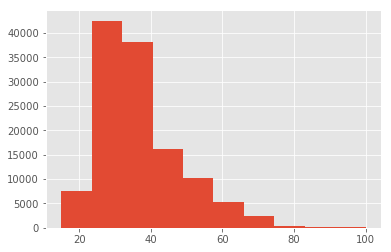

In [31]:
train.age.hist(bins=10)

In [32]:
gender_val = train.gender.values
train['gender'] = np.where(gender_val=='-unknown-', 'OTHER', gender_val)

In [33]:
# plt.hist(list(train['gender']))

In [34]:
train['gender'].describe()

count     213451
unique         3
top        OTHER
freq       95970
Name: gender, dtype: object

In [35]:
train = pd.read_csv('project/train_users_2.csv')
train.timestamp_first_active[0]

20090319043255

In [36]:
col = train.timestamp_first_active
year= [int(str(col[i])[:4]) for i in range(len(col))]
month= [int(str(col[i])[4:6]) for i in range(len(col))]
date = [int(str(col[i])[4:8]) for i in range(len(col))]
hour = [int(str(col[i])[8:10]) for i in range(len(col))]
minn = [int(str(col[i])[10:12]) for i in range(len(col))]
secs = [int(str(col[i])[12:]) for i in range(len(col))]

In [37]:
train.drop('timestamp_first_active', axis=1, inplace=True)

In [38]:
browser_type = train.first_browser
train.first_browser = np.where(browser_type=='-unknown-', 'OTHER', browser_type)

In [39]:
from collections import Counter
dict1 = Counter(train.signup_method)

Counter({'basic': 152897, 'facebook': 60008, 'google': 546})


([<matplotlib.axis.XTick at 0x2c227595470>,
 <a list of 3 Text xticklabel objects>)

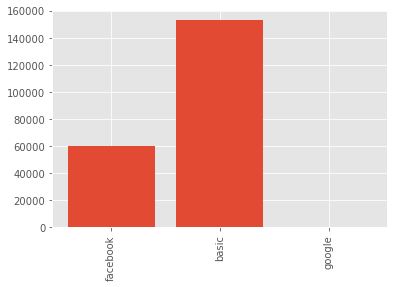

In [82]:
y=list(dict1.values())
x=list(dict1.keys())
print(dict1)
plt.bar(range(len(x)), y, align='center')
plt.xticks(range(len(x)), x, rotation=90)

In [40]:
train.drop('date_first_booking', axis=1, inplace=True)

In [41]:
train.first_affiliate_tracked.value_counts()
train.first_affiliate_tracked.fillna('untracked',inplace=True)
train.first_affiliate_tracked.value_counts()

untracked        115297
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

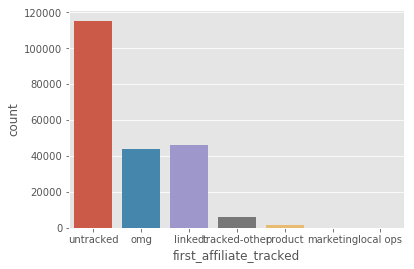

In [42]:
import seaborn as sns
sns.countplot(train.first_affiliate_tracked)
train['age'].fillna(-1, inplace=True)

In [43]:
train.isnull().sum()

id                         0
date_account_created       0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

In [44]:
sessions["action_type"].value_counts()

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [45]:
train.country_destination.value_counts(dropna=False)

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

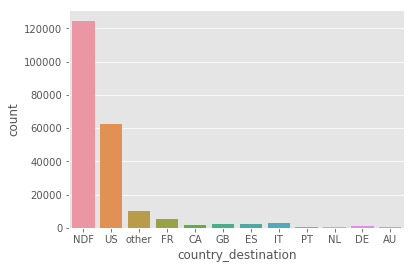

In [46]:
sns.countplot(train.country_destination)

In [47]:
sessions.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [48]:
nan_vals = sessions.loc[sessions['action'].isnull(), :]
nan_vals["action_type"].value_counts()
nan_vals["action_detail"].value_counts()

message_post    79626
Name: action_detail, dtype: int64

In [49]:
sessions.action_type.value_counts()
sessions.action_type.fillna('-unknown-',inplace=True)
sessions.action_type.value_counts()

view                3560902
-unknown-           2157374
data                2103770
click               1996183
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [50]:
sessions.action_detail.value_counts()
sessions.action_detail.fillna('-unknown-',inplace=True)
sessions.action_detail.value_counts().head()

-unknown-                  2157345
view_search_results        1776885
p3                         1376550
wishlist_content_update     706824
user_profile                656839
Name: action_detail, dtype: int64

In [51]:
sessions.isnull().sum()

user_id           34496
action            79626
action_type           0
action_detail         0
device_type           0
secs_elapsed     136031
dtype: int64

In [52]:
sessions.secs_elapsed.fillna(0,inplace=True)
sessions['action'].fillna('unknown', inplace=True)

In [53]:
sessions.dropna(subset=['user_id'],inplace=True)

In [54]:
sessions.isnull().sum()

user_id          0
action           0
action_type      0
action_detail    0
device_type      0
secs_elapsed     0
dtype: int64

In [26]:
##Data Cleaning of session file and train file done.
##todo: Merging of session file
##tdo EDA

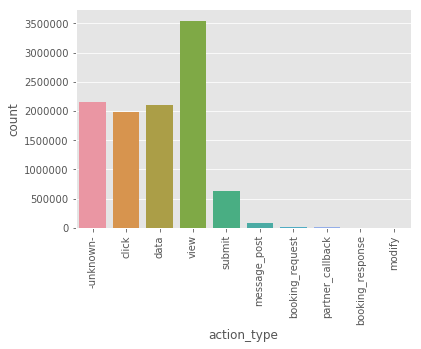

In [55]:
sns.countplot(sessions.action_type);
plt.xticks(rotation=90)
sns.despine()

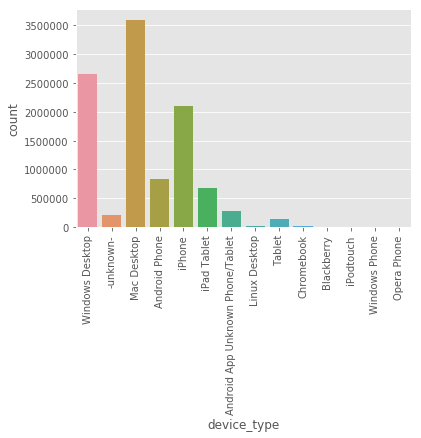

In [56]:
sns.countplot(sessions.device_type)
plt.xticks(rotation = 90)
sns.despine()

In [ ]:
age_val = age_bckt.age_bucket.values

age_val = np.array(age_val)

age_bckt['age_bucket'] = np.where(np.logical_or(age_val=='0-4', age_val=='5-9'), np.nan, age_val)
age_val = age_bckt.age_bucket.values

age_bckt['age_bucket'] = np.where(age_val=='100+', np.nan, age_val)

In [142]:
import math
bckt = []
for i in range(len(train)):
    if(train.age.values[i]!=-1):
        if(int(train.age.values[i]/5) == 1):
            bckt.append('5-9')
        elif(int(train.age.values[i]/5) == 2):
            bckt.append('10-14')
        elif(int(train.age.values[i]/5) == 3):
            bckt.append('15-19')
        elif(int(train.age.values[i]/5) == 4):
            bckt.append('20-24')
        elif(int(train.age.values[i]/5) == 5):
            bckt.append('25-29')
        elif(int(train.age.values[i]/5) == 6):
            bckt.append('30-34')
        elif(int(train.age.values[i]/5) == 7):
            bckt.append('35-39')
        elif(int(train.age.values[i]/5) == 8):
            bckt.append('40-44')
        elif(int(train.age.values[i]/5) == 9):
            bckt.append('45-49')
        elif(int(train.age.values[i]/5) == 10):
            bckt.append('50-54')
        elif(int(train.age.values[i]/5) == 11):
            bckt.append('55-59')
        elif(int(train.age.values[i]/5) == 12):
            bckt.append('60-64')
        elif(int(train.age.values[i]/5) == 13):
            bckt.append('65-69')
        elif(int(train.age.values[i]/5) == 14):
            bckt.append('70-74')
        elif(int(train.age.values[i]/5) == 15):
            bckt.append('75-79')
        elif(int(train.age.values[i]/5) == 16):
            bckt.append('80-84')
        elif(int(train.age.values[i]/5) == 17):
            bckt.append('85-89')
        elif(int(train.age.values[i]/5) == 18):
            bckt.append('90-94')
        elif(int(train.age.values[i]/5) == 19):
            bckt.append('95-99')
        else:
            bckt.append('-1')
    else:
        bckt.append('-1')
train['age_bucket'] = bckt

In [ ]:
# merged = pd.merge(train, age_bckt, how="left", left_on=["age_bucket","country_destination","gender"],
#                   right_on=["age_bucket","country_destination","gender"])

In [ ]:
train.head(20)

In [123]:
dict1={}
dict1['action']='count'                                            
dict1['device_type']='first'
dict1['secs_elapsed']=sum
session_data_group = sessions.groupby('user_id').agg(dict1)
session_data_group

,action,device_type,secs_elapsed
user_id,,,
00023iyk9l,40,Mac Desktop,867896.0
0010k6l0om,63,Mac Desktop,586543.0
001wyh0pz8,90,Android App Unknown Phone/Tablet,282965.0
0028jgx1x1,31,-unknown-,297010.0
002qnbzfs5,789,iPhone,6487080.0
0031awlkjq,8,iPhone,39574.0
0035hobuyj,489,Mac Desktop,5724670.0
00378ocvlh,75,Mac Desktop,1827164.0
00389675gq,177,Windows Desktop,2605711.0


In [ ]:
def session_merger(this,that):
    a = sessions.groupby([this,that]).count()['secs_elapsed'].unstack()
    return a
lst=['action','action_type','action_detail']
this='user_id'
mylst=[]
for that in lst:
    mylst.append(session_merger(this,that).fillna(0))
joined = pd.merge(mylst[0],mylst[1],left_index=True,right_index=True,how='inner')
joined2 = pd.merge(joined,mylst[2],left_index=True,right_index=True,how='inner')


In [140]:
joined2

,10,11,12,15,about_us,accept_decline,account,acculynk_bin_check_failed,acculynk_bin_check_success,acculynk_load_pin_pad,...,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
user_id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0
0010k6l0om,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
001wyh0pz8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0028jgx1x1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002qnbzfs5,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0031awlkjq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0035hobuyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,200.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0
00378ocvlh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
00389675gq,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,14.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0


In [64]:
session_train_merged = pd.merge(train,session_data_group,left_on='id',right_index=True,how='inner')

In [94]:
session_train_merged['booked_room'] = session_train_merged['country_destination']!='NDF'

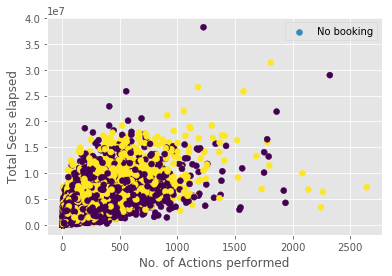

In [100]:
plt.scatter(session_train_merged['action'],session_train_merged['secs_elapsed'],c=session_train_merged['booked_room'])
plt.xlabel("No. of Actions performed")
plt.ylabel("Total Secs elapsed")

In [107]:
s =sum(session_train_merged['booked_room'])
t =len(session_train_merged)
print("Percentage of rooms booked ever approx:",int(s/t*100),"%")

Percentage of rooms booked ever approx: 38 %


In [115]:
categories = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_flow', 
    'signup_method'
]
session_train_merged=pd.get_dummies(session_train_merged,columns=categories)

In [116]:
df = sessions.groupby(['action','action_type']).count()['user_id']
df.sort_values(ascending=False)

action                       action_type 
show                         view            2081113
search_results               click            723124
personalize                  data             704782
index                        view             677575
show                         -unknown-        677554
search                       click            529424
ajax_refresh_subtotal        click            486414
similar_listings             data             363423
update                       submit           350086
social_connections           data             335577
reviews                      data             317415
active                       -unknown-        187370
similar_listings_v2          -unknown-        168457
lookup                       -unknown-        161422
dashboard                    view             152515
header_userpic               data             141315
index                        -unknown-        128557
collections                  view             122666
edit

,id,date_account_created,age,action,device_type,secs_elapsed,mins_elapced,hrs_elapced,booked,booked_room,...,signup_flow_0,signup_flow_8,signup_flow_12,signup_flow_21,signup_flow_23,signup_flow_24,signup_flow_25,signup_method_basic,signup_method_facebook,signup_method_google
137021,d1mm9tcy42,2014-01-01,62.0,127,Windows Desktop,3427529.0,57125.483333,952.091389,True,True,...,1,0,0,0,0,0,0,1,0,0
137022,yo8nz8bqcq,2014-01-01,-1.0,9,Mac Desktop,207842.0,3464.033333,57.733889,False,False,...,1,0,0,0,0,0,0,1,0,0
137023,4grx6yxeby,2014-01-01,-1.0,16,Windows Desktop,1135444.0,18924.066667,315.401111,False,False,...,1,0,0,0,0,0,0,1,0,0
137024,ncf87guaf0,2014-01-01,-1.0,152,Windows Desktop,3755100.0,62585.000000,1043.083333,False,False,...,1,0,0,0,0,0,0,1,0,0
137025,4rvqpxoh3h,2014-01-01,-1.0,8,iPhone,2555.0,42.583333,0.709722,True,True,...,0,0,0,0,0,0,1,1,0,0
137026,c8mfesvkv0,2014-01-01,-1.0,3,iPad Tablet,1380288.0,23004.800000,383.413333,False,False,...,1,0,0,0,0,0,0,1,0,0
137027,xwxei6hdk4,2014-01-01,32.0,7,iPhone,49673.0,827.883333,13.798056,True,True,...,1,0,0,0,0,0,0,0,1,0
137028,5f45ro5uzk,2014-01-01,-1.0,46,Windows Desktop,605413.0,10090.216667,168.170278,False,False,...,1,0,0,0,0,0,0,1,0,0
137029,ro2stddszp,2014-01-01,19.0,43,Mac Desktop,1284401.0,21406.683333,356.778056,True,True,...,1,0,0,0,0,0,0,1,0,0
137031,qtw88d9pbl,2014-01-01,25.0,364,Mac Desktop,2868205.0,47803.416667,796.723611,False,False,...,1,0,0,0,0,0,0,1,0,0
